In [6]:
from george import GP
from george.kernels import *
import numpy as np

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set()

In [8]:
from scipy import fftpack
import numpy as np
import pylab as py
#import radialProfile

def image_ps(image):
  
    # Take the fourier transform of the image.
    F1 = fftpack.fft2(image)

    # Now shift the quadrants around so that low spatial frequencies are in
    # the center of the 2D fourier transformed image.
    F2 = fftpack.fftshift( F1 )

    # Calculate a 2D power spectrum
    psd2D = np.abs( F2 )**2

    # Calculate the azimuthally averaged 1D power spectrum
    psd1D = azimuthalAverage(psd2D)

    return psd1D

In [9]:
def azimuthalAverage(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.

    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (x.max()-x.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

In [14]:
data_x.shape, data_y.shape, t[-(22**2):, :].shape

((4052, 2), (3612,), (484, 2))

In [38]:
N = 64
l = 10.0
n = 48

In [39]:
k = ExpSquaredKernel(l, ndim = 2)
gp = GP(k)
gp.compute(np.ones((1,2)))
XX, YY = np.meshgrid(range(N), range(N))
t = np.stack([XX.flatten(), YY.flatten()]).T

out = gp.sample(t)

data_x, data_y = t[:-(n**2)], out[:-(n**2)]

gp2 = GP(k)
gp.compute(data_x)

out2 = gp.sample_conditional(data_y, t[-(n**2):, :])


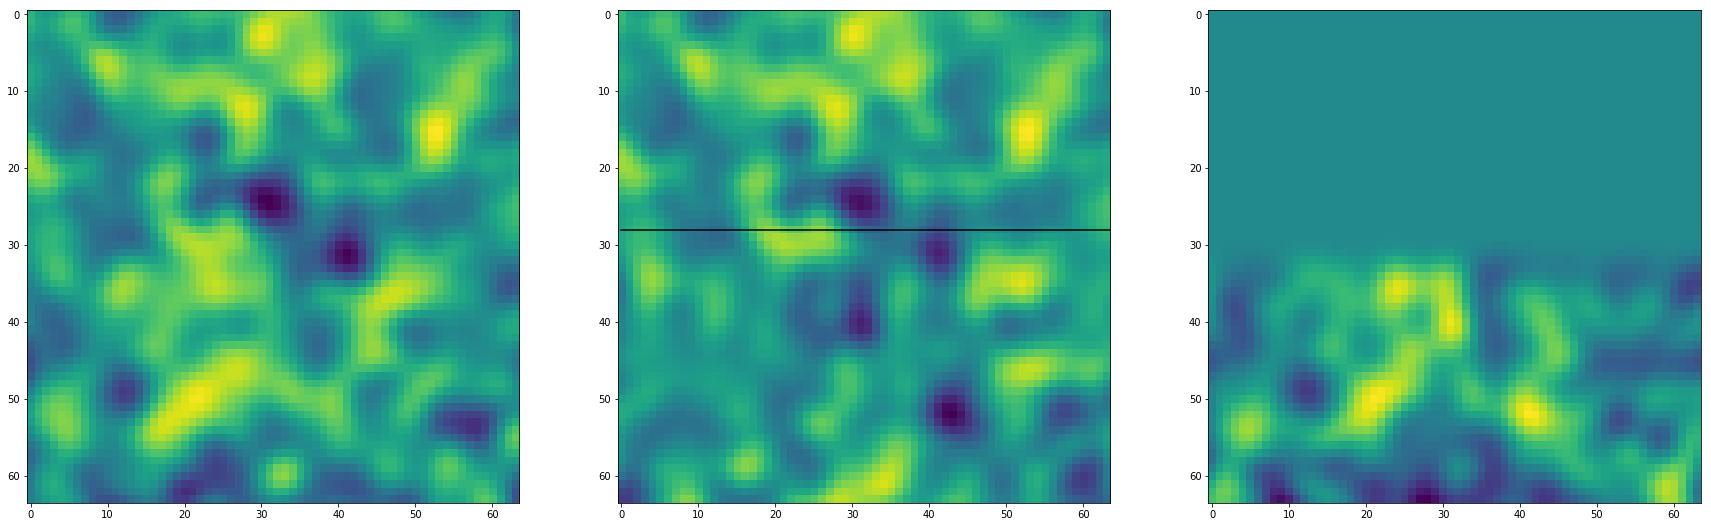

In [41]:
fig = plt.figure(figsize = (30,10))
plt.subplot(131)
plt.imshow(out.reshape((N,N)))
plt.subplot(132)
out_new = out.copy()
#plt.vlines(N-n, N-n, N)
plt.plot(np.linspace(0, N,10), np.ones(10)*(N-n**2/N), color = 'k')
out_new[-(n**2):] = out2
plt.imshow(out_new.reshape((N,N)))
plt.subplot(133)
plt.imshow( (out-out_new).reshape( (N,N)) )